In [49]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
import os

# Ecoli datasets

In [50]:
data = pd.read_csv('../summary_data/igh_from_master.csv')
print(data.columns)
data["Trim Effeciency"] = data["Base - TP TRIM"]/(data["Base - TP TRIM"] + data["Base - FP TRIM"])
data['total_corrections']=data['Base - TP']+ data['Base - FP']
data = data[(data['Kmer Size'] >19)]
data = data[(data['Kmer Size'] <= 30)]
data.head()

Index(['Unnamed: 0', 'EC Filename', 'Wrapper Name', 'Kmer Size', 'Read - TP',
       'Read - TN', 'Read - FN', 'Read - FN WRONG', 'Read - FP',
       'Read - FP INDEL', 'Total Trimmed Reads', 'Total Reads', 'Base - TP',
       'Base - TN', 'Base - FN', 'Base - FN WRONG', 'Base - FP',
       'Base - FP INDEL', 'Base - FP TRIM', 'Base - TP TRIM', 'Total Bases',
       'Tool', 'Coverage', 'Length', 'Base Sensitivity', 'Base Precision',
       'Base Gain', 'Base Accuracy', 'Dataset', 'Trim Percent',
       'Trim Effeciency'],
      dtype='object')


,Unnamed: 0,EC Filename,Wrapper Name,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,...,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Dataset,Trim Percent,Trim Effeciency,total_corrections
0,0,bfc_wgsim_rl_100_cov_1_20.corrected.fastq,bfc,20,265,28574,18139,3,209,0,...,1,100L,0.017462,0.580737,0.004855,0.995048,IGH,0.0,NaN,706
1,1,bfc_wgsim_rl_100_cov_1_22.corrected.fastq,bfc,22,249,28596,18180,3,162,0,...,1,100L,0.016952,0.638844,0.007369,0.995061,IGH,0.0,NaN,623
2,2,bfc_wgsim_rl_100_cov_1_24.corrected.fastq,bfc,24,236,28605,18186,3,160,0,...,1,100L,0.015716,0.627551,0.006389,0.995056,IGH,0.0,NaN,588
3,3,bfc_wgsim_rl_100_cov_1_26.corrected.fastq,bfc,26,245,28630,18192,2,121,0,...,1,100L,0.016610,0.714286,0.009966,0.995074,IGH,0.0,NaN,546
4,4,bfc_wgsim_rl_100_cov_1_28.corrected.fastq,bfc,28,223,28631,18219,2,115,0,...,1,100L,0.015034,0.714575,0.009029,0.995069,IGH,0.0,NaN,494


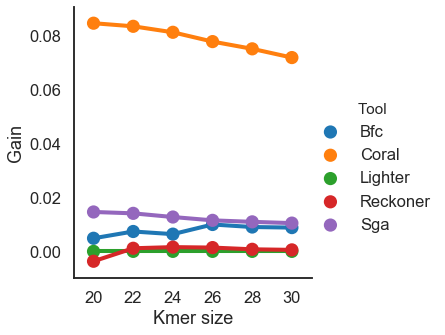

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Kmer Size", y="Base Gain", kind="point",data = data[(data['Coverage'] ==1)]
, hue='Tool')
g.set(xlabel='Kmer size', ylabel='Gain')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/ecoli_gain_cov1.png", bbox_inches='tight')

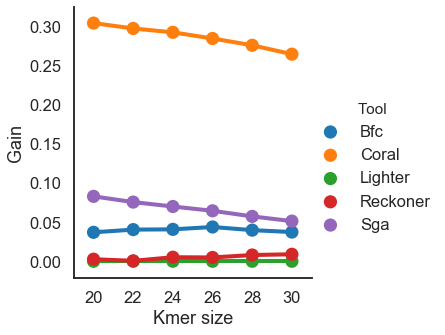

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Kmer Size", y="Base Gain", kind="point",data = data[(data['Coverage'] ==2)]
, hue='Tool')
g.set(xlabel='Kmer size', ylabel='Gain')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/ecoli_gain_cov2.png", bbox_inches='tight')

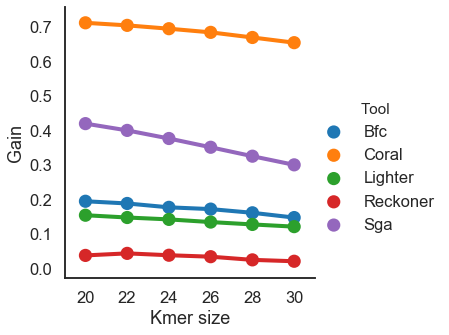

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Kmer Size", y="Base Gain", kind="point",data = data[(data['Coverage'] ==4)]
, hue='Tool')
g.set(xlabel='Kmer size', ylabel='Gain')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/ecoli_gain_cov4.png", bbox_inches='tight')

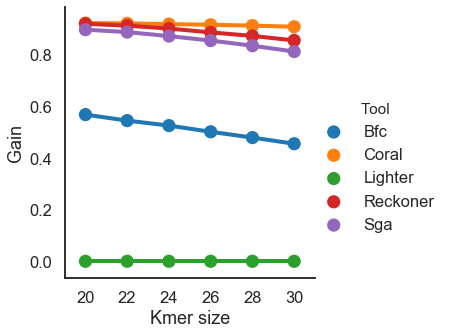

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Kmer Size", y="Base Gain", kind="point",data = data[(data['Coverage'] ==8)]
, hue='Tool')
g.set(xlabel='Kmer size', ylabel='Gain')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/ecoli_gain_cov8.png", bbox_inches='tight')

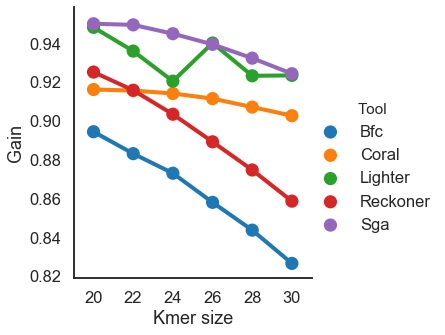

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Kmer Size", y="Base Gain", kind="point",data = data[(data['Coverage'] ==16)]
, hue='Tool')
g.set(xlabel='Kmer size', ylabel='Gain')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/ecoli_gain_cov16.png", bbox_inches='tight')

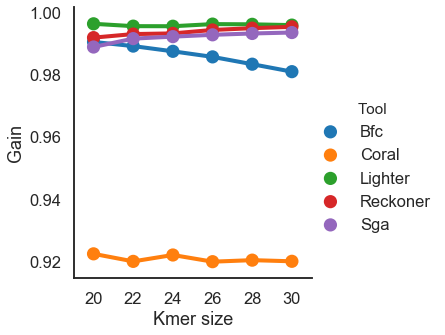

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Kmer Size", y="Base Gain", kind="point",data = data[(data['Coverage'] ==32)]
, hue='Tool')
g.set(xlabel='Kmer size', ylabel='Gain')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/ecoli_gain_cov32.png", bbox_inches='tight')

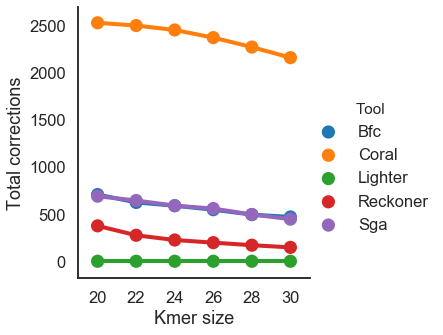

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Kmer Size", y="total_corrections", kind="point",data = data[(data['Coverage'] ==1)]
, hue='Tool')
g.set(xlabel='Kmer size', ylabel='Total corrections')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/ecoli_total_corrections_cov1.png", bbox_inches='tight')

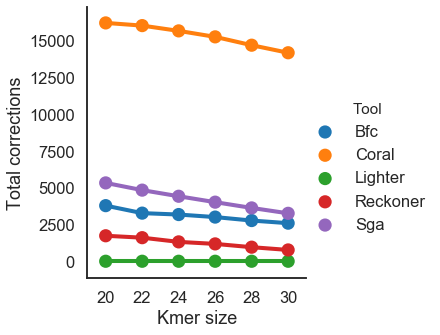

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Kmer Size", y="total_corrections", kind="point",data = data[(data['Coverage'] ==2)]
, hue='Tool')
g.set(xlabel='Kmer size', ylabel='Total corrections')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/ecoli_total_corrections_cov2.png", bbox_inches='tight')

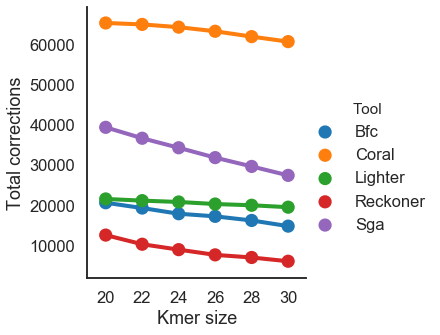

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Kmer Size", y="total_corrections", kind="point",data = data[(data['Coverage'] ==4)]
, hue='Tool')
g.set(xlabel='Kmer size', ylabel='Total corrections')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/ecoli_total_corrections_cov4.png", bbox_inches='tight')

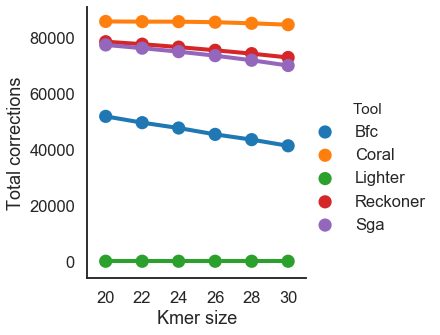

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Kmer Size", y="total_corrections", kind="point",data = data[(data['Coverage'] ==8)]
, hue='Tool')
g.set(xlabel='Kmer size', ylabel='Total corrections')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/ecoli_total_corrections_cov8.png", bbox_inches='tight')

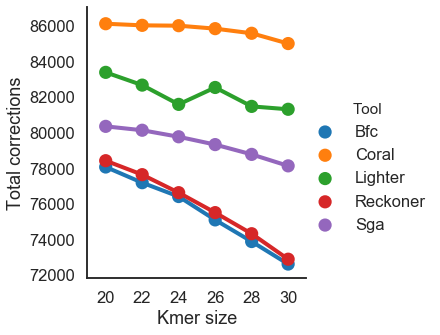

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Kmer Size", y="total_corrections", kind="point",data = data[(data['Coverage'] ==16)]
, hue='Tool')
g.set(xlabel='Kmer size', ylabel='Total corrections')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/ecoli_total_corrections_cov16.png", bbox_inches='tight')

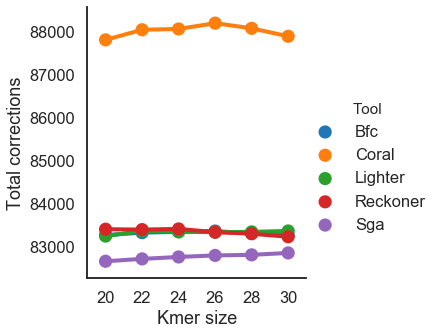

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g = sns.catplot(x="Kmer Size", y="total_corrections", kind="point",data = data[(data['Coverage'] ==32)]
, hue='Tool')
g.set(xlabel='Kmer size', ylabel='Total corrections')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/ecoli_total_corrections_cov32.png", bbox_inches='tight')